# Streams

A **Stream** is a list of arbitrary length which can be modified only by either appending an item to the tail of the list or extending the stream with a list of items. A **StreamArray** is a NumPy array of arbitrary length to which rows can be appended at the end.

## Creating a Stream

*s = Stream(name=‘temperature’, initial_value=[20, 21, 22])*

creates a stream with the specified name and initial value. Both the name and initial value can be omitted.
The default initial value is the empty stream.

## Appending an element to a Stream
You append an element to a Stream in the same way as for a list.

<b>Example:</b>

*s.append(23)* 
    appends the value 23 to the tail of stream *s*.

## Extending a Stream with a list of elements
You can extend a stream in the same way that you extend a list. 


<b>Example</b>:

*s.extend([24, 25])* extends stream *s* with the elements of the list [24, 25] appended to its tail.

# Examples
While you are testing the system you call the function *run()* to execute a single step in processing the stream. We will discuss how to start non-terminating stream applications later.

**s.print_recent()** prints the most recent values of stream **s**.

In [1]:
import sys
sys.path.append("../")

from stream import Stream, run

def example():
    # Declare and initialize a stream
    s = Stream(name='temperature', initial_value=[20, 21, 22])
    # Append an item --- 23 --- to stream s.
    s.append(23)
    # Extend stream s with the list [24, 25]
    s.extend([24, 25])

    # run a step
    run()
    s.print_recent()

example()

Stream.scheduler.register_stream
name  temperature
temperature  = [20, 21, 22, 23, 24, 25]


# StreamArray
The statement:

*s = StreamArray(name='s', dimension=3, dtype=int)*

creates a stream *s* where *s[n]* is a NumPy array consisting of an unbounded number of rows and 3 (i.e. dimension) columns and where the elements of the array are of type *int*. An item appended to this stream must be an array consisting of 3 integers; appending such a 3-element array appends a single row containing the 3 integers to the tail of s.

The parameters of **StreamArray** are: **name, dimension, dtype, initial_value,** and **num_in_memory**

1. **name** is optional and is a string. The default is ‘no_name’.

2. **dimension** is optional and is the dimension of elements of the stream array. The default is 0.

3. **dtype** is optional and is the type of the rows of the stream array. The default is float.

4. **initial_value** is optional and is the initial value of the stream array. The default is None.

1. **num_in_memory** is optional and can be ignored for the time being. It is used for memory management.

## StreamArray with dimension = 0

The **dimension** parameter can be a non-negative integer or a tuple or list. If dimension is 0 then each element of the stream array belongs to type dtype. In this case, think of the stream array as a 1-D array of unbounded length with elements of type dtype. 

For example:

*t = StreamArray()*

makes *t* a stream array where *t* is effectively an array of unbounded size where each element of *t* is a float.

## StreamArray where dimension is a positive integer

If **dimension** is a positive integer then each element of the stream is a 1-D array whose length is **dimension**. For example:

*u = StreamArray(name='pressure', dimension=2, dtype=float)*

makes *u* a stream array called pressure. Think of *u* as an array with an unbounded number of rows where each row of *u* is an array consisting of 2 floats.


## StreamArray where dimension is a tuple or list

**dimension** can be a tuple or list. Each element of the tuple must be a positive integer. Think of the stream array as having an unbounded number of rows where each row is an N-dimensional array where N is the length of the tuple. The lengths of the N-dimensional array are given by the tuple. For example, 

*v = StreamArray(dimension=(3,4), dtype=int)*

makes *v* a stream array where each row of *v* is a 3 x 4 array of integers.

## append or extend a StreamArray

You can append or extend a **StreamArray** in the same way that you do a **Stream.** Ensure that the types of the arrays that you are appending or extending match the types of the **StreamArray**.

## Example of StreamArray with default dimension of 0

In [2]:
import numpy as np
from stream import StreamArray, run

def example():
    t = StreamArray(name='t')
    s = StreamArray(name='s', dtype=int)
    t.append(np.array(1.0))
    s.append(np.array(1))
    
    # run a step and print
    run()
    t.print_recent()
    s.print_recent()
    
    # run a step and print
    t.append(np.array(2.0))
    s.append(np.array(2))
    run()
    t.print_recent()
    s.print_recent()


example()

t  = [1.]
s  = [1]
t  = [1. 2.]
s  = [1 2]


## Example of StreamArray of int when dimension is a positive integer
### StreamArray of int

In [3]:
def example():
    s = StreamArray(name='temperatures', dimension=3, dtype=int)
    
    s.append(np.zeros(3, dtype=int))
    
    # run a step and print
    run()
    s.print_recent()
    
    s.append(np.array([1, 2, 3]))
    # run a step and print
    run()
    s.print_recent()

example()

temperatures  = [[0 0 0]]
temperatures  = [[0 0 0]
 [1 2 3]]


## Example of StreamArray of float when dimension is a positive integer
### StreamArray of float

In [4]:
def example():
    u = StreamArray(name='pressure', dimension=3, dtype=float)
    
    u.append(np.array([0.0, 0.0, 0.0]))
    
    # run a step and print
    run()
    u.print_recent()
    
    u.append(np.array([1.0, 2.0, 3.0]))
    
    # run a step and print
    run()
    u.print_recent()

example()

pressure  = [[0. 0. 0.]]
pressure  = [[0. 0. 0.]
 [1. 2. 3.]]


## Example of StreamArray when dimension is a tuple

In [5]:
def example():
    v = StreamArray(name="prices", dimension=(3,4), dtype=int)
    # Each element of v is a numpy array with 3 rows and 4 columns
    
    v.append(np.array([
        [0, 1, 2, 3],
        [4, 5, 6, 7],
        [8, 9, 10, 11]]))
    
    # run a step and print
    run()
    v.print_recent()
    
    v.append(np.array([
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))
    
    # run a step and print
    run()
    v.print_recent()

example()

prices  = [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]]
prices  = [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


# Extending StreamArray


## Example: Extend StreamArray of float with dimension of 0
### Extend the StreamArray with a linear numpy array of the same type

In [6]:
def example():
    # default dtype is float and default dimension is 0
    t = StreamArray(name='t')
    t.extend(np.array([1.0, 2.0]))
    
    # run a step and print
    run()
    t.print_recent()
    
    t.extend(np.array([3.0, 4.0]))
    
    # run a step and print
    run()
    t.print_recent()


example()

t  = [1. 2.]
t  = [1. 2. 3. 4.]


## Example: Extend StreamArray when dimension is a positive integer
### StreamArray of int

You can extend a **StreamArray** by an array consisting of multiple rows where the dimensions of rows of the array and the **StreamArray** are identical.

In [7]:
def example():
    s = StreamArray(name='temperatures', dimension=3, dtype=int)
    # Extend s with a numpy array with an arbitrary (positive) number
    # of rows and 3 columns
    
    s.extend(np.array(
        [[0, 1, 2],
        [3, 4, 5]]
    ))
    
    # run a step and print
    run()
    s.print_recent()

    
    s.extend(np.array(
        [[6, 7, 8],
        [9, 10, 11],
        [12, 13, 14]]
    ))
    
    # run a step and print
    run()
    s.print_recent()
             
example()



temperatures  = [[0 1 2]
 [3 4 5]]
temperatures  = [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## Example: Extend StreamArray where dimension is a tuple

Extend the StreamArray with a numpy array with an arbitrary (positive) number of rows and where each row is a numpy array with the specified dimensions.

In [8]:
def example():
    v = StreamArray(name="prices", dimension=(3,4), dtype=int)
    # Extend v with a numpy array with an arbitrary positive number
    # of rows and where each row is an array with dimension (3, 4)
    
    # Example: extend v with a numpy array with 2 rows, and where
    # each row is a numpy array with dimension (3, 4)
    v.extend(np.array([
        [[12, 13, 14, 15],[16, 17, 18, 19], [20, 21, 22, 23]],
        [[24, 25, 26, 27], [28, 29, 30, 31], [32, 33, 34, 35]]]))
    
    # run a step and print
    run()
    v.print_recent()
    
    # Example: append v with a numpy array with dimension (3, 4)
    v.append(np.array([
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))
    
    # run a step and print
    run()
    v.print_recent()

example()

prices  = [[[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]
  [32 33 34 35]]]
prices  = [[[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]
  [32 33 34 35]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


# StreamArray with user-defined types


An example of a user-defined type is:

*txyz_dtype = np.dtype([('time','int'), ('data', '3float')])*

An example of an object, *c*, of this type is created by:

*c = np.array((1, [0.0, 1.0, 2.0]), dtype=txyz_dtype)*

Then, *c[‘time’]* has type *np.array(1)*, and *c['data']* has type *np.array([ 0.0,  1.0,  2.0]*

## Creating a StreamArray with user-defined types

*y = StreamArray(dimension=0, dtype=txyz_dtype)*

creates a stream array, *y*, whose elements are of type *txyz_dtype*. Think of *y* as an array with an arbitrary number of rows where each row is an array of type *txyz_dtype*.

### Examples of appending and extending a StreamArray with user-defined types

In [9]:
def example():
    
    txyz_dtype = np.dtype([('time','int'), ('data', '3float')])
    
    y = StreamArray(name='y', dimension=0, dtype=txyz_dtype)
    
    y.append(
        np.array((1, [0.0, 1.0, 2.0]), dtype=txyz_dtype)
    )
    
    # run a step and print
    run()
    y.print_recent()
    
    y.extend(
        np.array([
            (2, [3., 4., 5.]), 
            (3, [6., 7., 8.])], 
            dtype=txyz_dtype)
    )
    
    # run a step and print
    run()
    y.print_recent()

example()

y  = [(1, [0., 1., 2.])]
y  = [(1, [0., 1., 2.]) (2, [3., 4., 5.]) (3, [6., 7., 8.])]


# Part of a Stream in Memory

Associated with a stream **s** is a list **s.recent**, and nonnegative integers **s.offset** and **s.stop.** 

The entire stream may not be stored in main memory. The part of stream **s** that is stored in main memory is the slice **s.recent[0: s.stop]** which contains the most recent elements of stream **s** starting with index **s.offset**. 

Therefore,  

---
for **0 <= j < s.stop: s.recent[j] = s.[s.offset + j]**.

---

Elements of stream **s** with indices less than **s.offset** are either stored in files or discarded depending on implementation parameters. Values of **s.recent[j]** for **j >= s.stop** are unspecified; in the current implementation these values are 0.


In the diagram below **s.offset** is **N**, and **s.stop** is **M**.



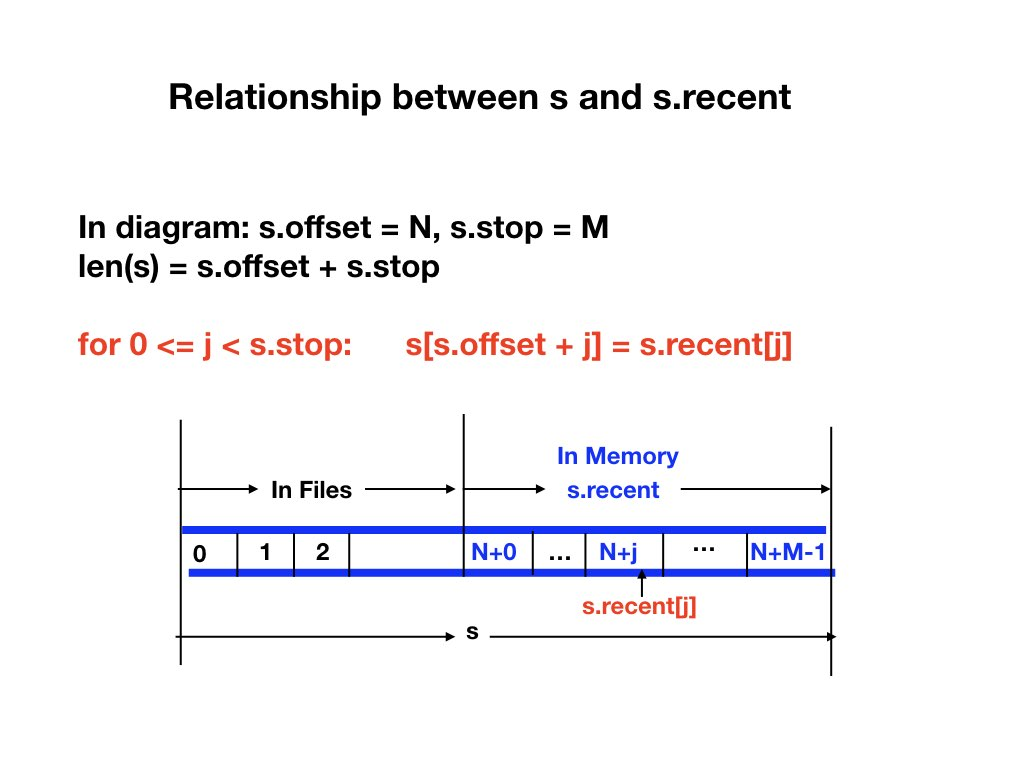

For a stream **s** a function can read a list the slice **s.recent[0 : s.stop]** of stream **s**. The slice **s.recent[0 : s.stop]** is the same as **s[s.offest : s.offset + s.stop]**. 

For example, suppose **s.offset = 2** and **len(s) = 5**, and **s.stop = len(s) - s.offset = 3**. 

Then **s[2 : 5] = s.recent[0 : 3]**.

Next look at subscribers to streams how they operate on streams.